In [2]:
import pandas as pd
import numpy as np

ds_long = pd.read_csv('/Users/irenebernardi/Desktop/DS/miniproject/nsds2024-dsns2024-3d74831c793d/data/2023-11-06_09_24_37_Apple Watch.csv')
ds_long

,loggingTime(txt),locationTimestamp_since1970(s),locationLatitude(WGS84),locationLongitude(WGS84),locationAltitude(m),locationSpeed(m/s),locationSpeedAccuracy(m/s),locationCourse(°),locationCourseAccuracy(°),locationVerticalAccuracy(m),...,pedometerDistance(m),pedometerFloorAscended(N),pedometerFloorDescended(N),pedometerEndDate(txt),altimeterTimestamp_sinceReboot(s),altimeterReset(bool),altimeterRelativeAltitude(m),altimeterPressure(kPa),batteryState(N),batteryLevel(R)
0,2023-11-06T09:24:37.756+02:00,0,0,0,0,0,-1,0,-1,-1,...,7.403943,0,0,2023-11-06T09:23:25.206+02:00,7.209483e+08,0,-0.989990,101.7212,1,0.7
1,2023-11-06T09:24:37.762+02:00,0,0,0,0,0,-1,0,-1,-1,...,7.403943,0,0,2023-11-06T09:23:25.206+02:00,7.209483e+08,0,-0.989990,101.7212,1,0.7
2,2023-11-06T09:24:37.776+02:00,0,0,0,0,0,-1,0,-1,-1,...,7.403943,0,0,2023-11-06T09:23:25.206+02:00,7.209483e+08,0,-0.989990,101.7212,1,0.7
3,2023-11-06T09:24:37.790+02:00,0,0,0,0,0,-1,0,-1,-1,...,7.403943,0,0,2023-11-06T09:23:25.206+02:00,7.209483e+08,0,-0.989990,101.7212,1,0.7
4,2023-11-06T09:24:37.809+02:00,0,0,0,0,0,-1,0,-1,-1,...,7.403943,0,0,2023-11-06T09:23:25.206+02:00,7.209483e+08,0,-0.989990,101.7212,1,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785,2023-11-06T09:25:13.277+02:00,0,0,0,0,0,-1,0,-1,-1,...,93.252620,0,0,2023-11-06T09:25:12.267+02:00,7.209483e+08,0,-3.529999,101.7556,1,0.7
1786,2023-11-06T09:25:13.297+02:00,0,0,0,0,0,-1,0,-1,-1,...,93.252620,0,0,2023-11-06T09:25:12.267+02:00,7.209483e+08,0,-3.529999,101.7556,1,0.7
1787,2023-11-06T09:25:13.317+02:00,0,0,0,0,0,-1,0,-1,-1,...,93.252620,0,0,2023-11-06T09:25:12.267+02:00,7.209483e+08,0,-3.529999,101.7556,1,0.7
1788,2023-11-06T09:25:13.337+02:00,0,0,0,0,0,-1,0,-1,-1,...,93.252620,0,0,2023-11-06T09:25:12.267+02:00,7.209483e+08,0,-3.529999,101.7556,1,0.7


In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from matplotlib.patches import Rectangle, PathPatch
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D
import mpl_toolkits.mplot3d.art3d as art3d
import pandas as pd
import scipy.signal as sig

In [3]:
ds_long.columns

Index(['loggingTime(txt)', 'locationTimestamp_since1970(s)',
       'locationLatitude(WGS84)', 'locationLongitude(WGS84)',
       'locationAltitude(m)', 'locationSpeed(m/s)',
       'locationSpeedAccuracy(m/s)', 'locationCourse(°)',
       'locationCourseAccuracy(°)', 'locationVerticalAccuracy(m)',
       'locationHorizontalAccuracy(m)', 'locationFloor(Z)',
       'accelerometerTimestamp_sinceReboot(s)',
       'accelerometerAccelerationX(G)', 'accelerometerAccelerationY(G)',
       'accelerometerAccelerationZ(G)', 'motionTimestamp_sinceReboot(s)',
       'motionYaw(rad)', 'motionRoll(rad)', 'motionPitch(rad)',
       'motionRotationRateX(rad/s)', 'motionRotationRateY(rad/s)',
       'motionRotationRateZ(rad/s)', 'motionUserAccelerationX(G)',
       'motionUserAccelerationY(G)', 'motionUserAccelerationZ(G)',
       'motionAttitudeReferenceFrame(txt)', 'motionQuaternionX(R)',
       'motionQuaternionY(R)', 'motionQuaternionZ(R)', 'motionQuaternionW(R)',
       'motionGravityX(G)', 'moti

In [4]:
ds_long['pedometerStartDate(txt)']

0       2023-11-06T09:23:03.878+02:00
1       2023-11-06T09:23:03.878+02:00
2       2023-11-06T09:23:03.878+02:00
3       2023-11-06T09:23:03.878+02:00
4       2023-11-06T09:23:03.878+02:00
                    ...              
1785    2023-11-06T09:23:03.878+02:00
1786    2023-11-06T09:23:03.878+02:00
1787    2023-11-06T09:23:03.878+02:00
1788    2023-11-06T09:23:03.878+02:00
1789    2023-11-06T09:23:03.878+02:00
Name: pedometerStartDate(txt), Length: 1790, dtype: object

In [6]:
ds_longcopy= ds_long.copy()
ds_longcopy= ds_longcopy[['accelerometerAccelerationX(G)', 'accelerometerAccelerationY(G)', 'accelerometerAccelerationZ(G)', 'motionUserAccelerationX(G)', 'motionUserAccelerationY(G)', 'motionUserAccelerationZ(G)']]
ds_longcopy

,accelerometerAccelerationX(G),accelerometerAccelerationY(G),accelerometerAccelerationZ(G),motionUserAccelerationX(G),motionUserAccelerationY(G),motionUserAccelerationZ(G)
0,-0.002411,0.208420,-1.136719,0.080129,0.028666,-0.172331
1,-0.103012,0.114624,-1.129150,0.090324,-0.016977,-0.166030
2,-0.106857,0.172791,-1.137863,0.064962,-0.066362,-0.168792
3,-0.176605,0.260345,-1.103073,0.020608,0.031249,-0.156098
4,-0.250320,0.290787,-1.013153,-0.050174,0.096728,-0.097673
...,...,...,...,...,...,...
1785,-0.303223,-0.016769,-1.551071,-0.016265,0.245777,-0.580462
1786,-0.363525,-0.109253,-1.439026,-0.165975,0.044570,-0.541288
1787,-0.228836,-0.224930,-1.214386,-0.127869,-0.114395,-0.353843
1788,-0.186478,-0.194382,-0.995377,0.065926,-0.180930,-0.135169


<AxesSubplot:>

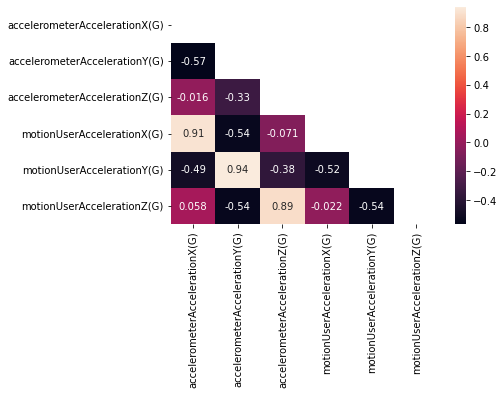

In [7]:
import seaborn as sns

corr = ds_longcopy.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix)

In [10]:
#visualize projections in space of our vectors

class Arrow3D(FancyArrowPatch):

    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._xyz = (x, y, z)
        self._dxdydz = (dx, dy, dz)

    def draw(self, renderer):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)
        
    def do_3d_projection(self, renderer=None):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))

        return np.min(zs) 


def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)


setattr(Axes3D, 'arrow3D', _arrow3D)


def text3d(ax, xyz, s, zdir="z", size=None, angle=0, usetex=False, **kwargs):
    x, y, z = xyz
    if zdir == "y":
        xy1, z1 = (x, z), y
    elif zdir == "x":
        xy1, z1 = (y, z), x
    else:
        xy1, z1 = (x, y), z

    text_path = TextPath((0, 0), s, size=size, usetex=usetex)
    trans = Affine2D().rotate(angle).translate(xy1[0], xy1[1])

    p1 = PathPatch(trans.transform_path(text_path), **kwargs)
    ax.add_patch(p1)
    art3d.pathpatch_2d_to_3d(p1, z=z1, zdir=zdir)

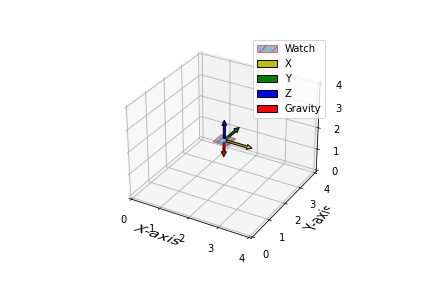

In [14]:
#plotting our accelerometer acceleration vectors in space

%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Get gravity at time index.
grvcols = ['accelerometerAccelerationX(G)', 'accelerometerAccelerationY(G)', 'accelerometerAccelerationZ(G)']
gx = ds_long [grvcols [0]] [3]
gy = ds_long [grvcols [1]] [3]
gz = ds_long [grvcols [2]] [3]
# Draw the watch coordinate system
cx = (1, 0, 0)
cy = (0, 1, 0)
cz = (0, 0, 1)

# Draw a circle on the x=0 'wall'
p = Rectangle((1.75, 1.75), 0.5, 0.5, edgecolor='red', hatch='//', alpha=0.5, label='Watch')
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=2, zdir="z")

# Draw watch coordinate system
for vec, name, colour in zip ((cx, cy, cz), ('X', 'Y', 'Z'), ('y', 'g', 'b')):
    ax.arrow3D (2, 2, 2, *vec, mutation_scale=10, fc=colour, label=name)

# Draw the gravity vector.
ax.arrow3D (2, 2, 2, gx, gy, gz, mutation_scale=10, fc='red', label='Gravity')
# Manually label the axes
text3d(ax, (1, -1.5, 0), "X-axis", zdir="z", size=.5, usetex=False,
       ec="none", fc="k")
text3d(ax, (5.5, 1, 0), "Y-axis", zdir="z", size=.5, usetex=False,
       angle=np.pi / 2, ec="none", fc="k")
text3d(ax, (5.5, 4, 2), "Z-axis", zdir="y", size=.5, usetex=False,
       angle=np.pi / 2, ec="none", fc="k")

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
ax.set_zlim(0, 4)

plt.legend ()

plt.show()
plt.tight_layout ()



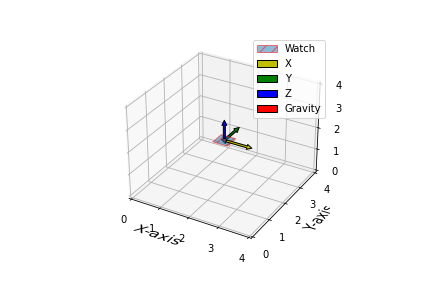

In [15]:
%matplotlib widget

#plotting our motion user vectors in space
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Get gravity at time index.
grvcols = ['motionUserAccelerationX(G)', 'motionUserAccelerationY(G)', 'motionUserAccelerationZ(G)']
gx = ds_long [grvcols [0]] [3]
gy = ds_long [grvcols [1]] [3]
gz = ds_long [grvcols [2]] [3]
# Draw the watch coordinate system
cx = (1, 0, 0)
cy = (0, 1, 0)
cz = (0, 0, 1)

# Draw a circle on the x=0 'wall'
p = Rectangle((1.75, 1.75), 0.5, 0.5, edgecolor='red', hatch='//', alpha=0.5, label='Watch')
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=2, zdir="z")

# Draw watch coordinate system
for vec, name, colour in zip ((cx, cy, cz), ('X', 'Y', 'Z'), ('y', 'g', 'b')):
    ax.arrow3D (2, 2, 2, *vec, mutation_scale=10, fc=colour, label=name)

# Draw the gravity vector.
ax.arrow3D (2, 2, 2, gx, gy, gz, mutation_scale=10, fc='red', label='Gravity')
# Manually label the axes
text3d(ax, (1, -1.5, 0), "X-axis", zdir="z", size=.5, usetex=False,
       ec="none", fc="k")
text3d(ax, (5.5, 1, 0), "Y-axis", zdir="z", size=.5, usetex=False,
       angle=np.pi / 2, ec="none", fc="k")
text3d(ax, (5.5, 4, 2), "Z-axis", zdir="y", size=.5, usetex=False,
       angle=np.pi / 2, ec="none", fc="k")

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
ax.set_zlim(0, 4)

plt.legend ()

plt.show()
plt.tight_layout ()

#ортогональные 

In [16]:
#TODO: CPASTE QUESTION 
#checking orthogonality of vectors

grvcols = ['motionUserAccelerationX(G)', 'motionUserAccelerationY(G)', 'motionUserAccelerationZ(G)']
gx = ds_long[grvcols[0]]
gy = ds_long[grvcols[1]]
gz = ds_long[grvcols[2]]

# Create NumPy arrays for the vectors
v1 = np.array([gx.values[0], gy.values[0], gz.values[0]])
v2 = np.array([gx.values[1], gy.values[1], gz.values[1]])
v3 = np.array([gx.values[2], gy.values[2], gz.values[2]])

# Calculate dot products between vectors
dot_product_v1_v2 = np.dot(v1, v2)
dot_product_v1_v3 = np.dot(v1, v3)
dot_product_v2_v3 = np.dot(v2, v3)

print(dot_product_v1_v2)
print(dot_product_v1_v3)
print(dot_product_v2_v3)
# Check if dot products are zero (orthogonal)
if dot_product_v1_v2 == 0 and dot_product_v1_v3 == 0 and dot_product_v2_v3 == 0:
    print("The vectors are orthogonal.")
else:
    print("The vectors are not orthogonal.")

#NOISE, basically orthogonal (almost)

0.03536295745059325
0.032391006667911615
0.0350187841142082
The vectors are not orthogonal.



Yes, it's reasonable to assume that the X, Y, and Z axes of sensors like the accelerometer, accelerometerData, and UserMotion sensors on devices such as the Apple Watch ideally should be orthogonal. Any deviation from orthogonality might indeed be attributed, at least partially, to measurement noise or other factors:

Measurement Noise: Variations or inaccuracies in sensor measurements due to noise can contribute to deviations from perfect orthogonality. Noise from various sources, including electronic interference or sensor limitations, can affect measurements along different axes.

In [17]:
# Check if each vector is a unit vector
def check_unit_vector(vector):
    mag = np.linalg.norm(vector)  # Calculate the magnitude using np.linalg.norm
    return np.isclose(mag, 1.0)  # Tolerant check due to potential floating-point errors

# Check if all three vectors are unit vectors
is_unit_vector_gx = check_unit_vector(gx)
is_unit_vector_gy = check_unit_vector(gy)
is_unit_vector_gz = check_unit_vector(gz)

# Print the results
print(f"Vector gx is a unit vector: {is_unit_vector_gx}")
print(f"Vector gy is a unit vector: {is_unit_vector_gy}")
print(f"Vector gz is a unit vector: {is_unit_vector_gz}")

Vector gx is a unit vector: False
Vector gy is a unit vector: False
Vector gz is a unit vector: False


In [18]:
#TODO MAYBE DELETE
# Check for collinearity among the vectors
def are_collinear(vec1, vec2, vec3):
    # Check if vectors are in 3D
    if len(vec1) != 3 or len(vec2) != 3 or len(vec3) != 3:
        raise ValueError("Vectors must be three-dimensional (have three elements each)")

    # Calculate cross products
    cross_product_v1v2 = np.cross(vec1, vec2)
    cross_product_v1v3 = np.cross(vec1, vec3)
    cross_product_v2v3 = np.cross(vec2, vec3)

    # Check if cross products are close to zero (indicating collinearity)
    return np.allclose(cross_product_v1v2, 0) or np.allclose(cross_product_v1v3, 0) or np.allclose(cross_product_v2v3, 0)

# Check for collinearity among the vectors gx, gy, and gz
collinear = are_collinear(gx[0:3], gy[0:3], gz[0:3])

# Print the result
if collinear:
    print("The vectors are collinear.")
else:
    print("The vectors are not collinear.")

The vectors are not collinear.


In an Apple Watch, the X, Y, and Z components of the `motionUserAcceleration` and `accelerometerAcceleration` sensors might not be perfectly orthogonal. Here's a detailed explanation:

The `motionUserAcceleration` and `accelerometerAcceleration` sensors in an Apple Watch measure the acceleration in three dimensions: X, Y, and Z. These sensors typically operate using accelerometers to detect the changes in velocity (acceleration) along these axes.

For the sensor readings to be truly orthogonal, it would mean that the measurements along each axis (X, Y, and Z) are completely independent of each other. In an ideal situation, orthogonal sensors would measure pure acceleration along each axis without any influence from the other axes.

However, in reality, various factors can contribute to the non-orthogonality of these sensors:

1. **Cross-Talk:** Sensors may not be perfectly isolated from each other. Acceleration in one direction might induce small, unintended readings along other axes due to mechanical or electrical coupling, known as cross-talk.

2. **Sensor Alignment:** The physical arrangement of sensors within the device might not be perfect. Imperfections in sensor placement or alignment could introduce deviations from orthogonality.

3. **Environmental Factors:** External factors such as gravitational forces or external accelerations (e.g., device movement not aligned with the axes) can affect sensor readings, causing variations that deviate from perfect orthogonality.

4. **Sensor Noise and Error:** Sensor noise, inaccuracies, or calibration errors inherent in the sensor technology could introduce minor discrepancies between the axes.

While efforts are made to ensure that these sensors are as close to orthogonal as possible, real-world limitations in manufacturing, design, and external factors can lead to some degree of non-orthogonality in the readings obtained from these sensors.

For many practical applications, the deviations from perfect orthogonality in these sensors might be negligible or corrected through calibration. However, in precise applications where perfect orthogonality is crucial, additional compensation or calibration might be necessary to mitigate these deviations.

Q: Plot (in any helpful way for you) pieces of data to explore what it looks like and what can be guessed about it based on the visual inspection. What are some of the interesting recorded sensors

A: TODO: phrase what it is about z that changes w respect to x and y 
We decided to inspect pedometer values in order to compare step count with differences in frequencies in the accelerometer and user motion sensors. 

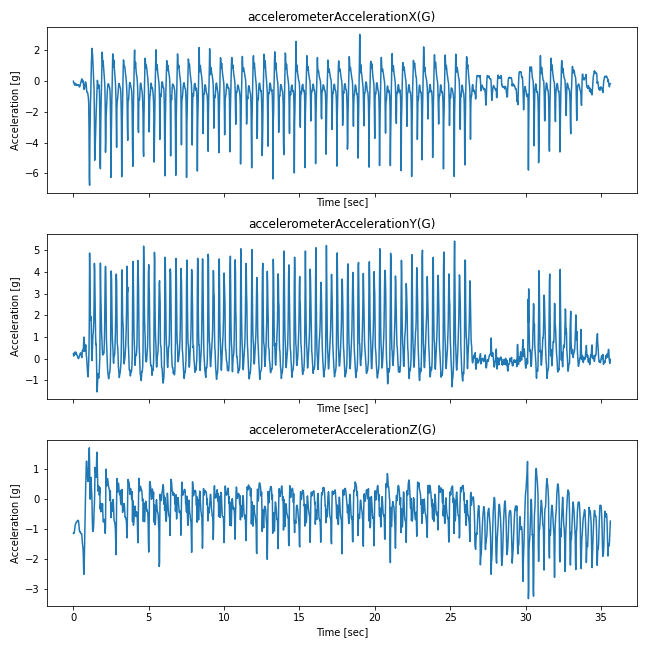

In [23]:
%matplotlib widget

#plotting pieces of the data based on accelerometer

acccols = ['accelerometerAccelerationX(G)', 'accelerometerAccelerationY(G)',
           'accelerometerAccelerationZ(G)']

fig, axes = plt.subplots (nrows=3, ncols=1, figsize=(9,9), sharex=True, squeeze=False)
axes = axes.flatten ()

xtime = ds_long['accelerometerTimestamp_sinceReboot(s)']
xtime = xtime - xtime [0]

for axis, col in zip (axes, acccols):
    yacc = ds_long [col]
    axis.plot (xtime, yacc, label=col)
    axis.set_title (col)
    axis.set_xlabel ('Time [sec]')
    axis.set_ylabel ('Acceleration [g]')

plt.tight_layout ()

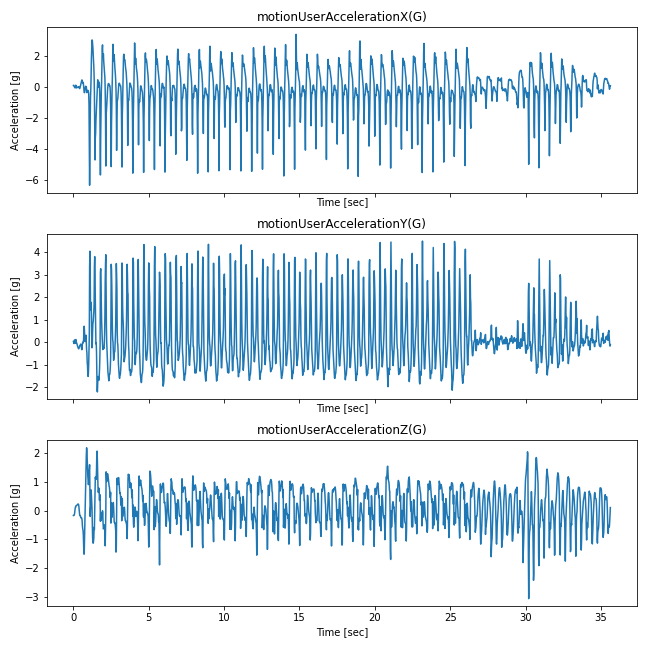

In [24]:
#plotting pieces of the data based on motion user 
%matplotlib widget


acccols2 = ['motionUserAccelerationX(G)', 'motionUserAccelerationY(G)',
           'motionUserAccelerationZ(G)']

fig, axes = plt.subplots (nrows=3, ncols=1, figsize=(9,9), sharex=True, squeeze=False)
axes = axes.flatten ()

xtime = ds_long['motionTimestamp_sinceReboot(s)']
xtime = xtime - xtime [0]

for axis, col in zip (axes, acccols2):
    yacc = ds_long [col]
    axis.plot (xtime, yacc, label=col)
    axis.set_title (col)
    axis.set_xlabel ('Time [sec]')
    axis.set_ylabel ('Acceleration [g]')

plt.tight_layout ()

REPHRASE After inspecting pedometer values, we confirmed that the 0 values in MUA and AA correspond to not walking.


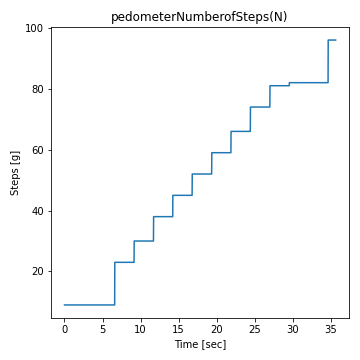

In [25]:
#inspecting data based on pedometer
acccols3 = ['pedometerNumberofSteps(N)']

%matplotlib widget
fig, axes = plt.subplots (nrows=1, ncols=1, figsize=(5,5), sharex=True, squeeze=False)
axes = axes.flatten ()

xtime = ds_long['motionTimestamp_sinceReboot(s)']
xtime = xtime - xtime [0]

for axis, col in zip (axes, acccols3):
    yacc = ds_long [col]
    axis.plot (xtime, yacc, label=col)
    axis.set_title (col)
    axis.set_xlabel ('Time [sec]')
    axis.set_ylabel ('Steps [g]')

plt.tight_layout ()

In [26]:
ds_long['pedometerEndDate(txt)'] = pd.to_datetime(ds_long['pedometerEndDate(txt)'])
ds_long['pedometerStartDate(txt)'] = pd.to_datetime(ds_long['pedometerStartDate(txt)'])

In [29]:
ds_long['time_diff_seconds_pedometer'] = (ds_long['pedometerEndDate(txt)'] - ds_long['pedometerStartDate(txt)']).dt.total_seconds()

ds_long['time_diff_seconds_pedometer']

0        21.328
1        21.328
2        21.328
3        21.328
4        21.328
         ...   
1785    128.389
1786    128.389
1787    128.389
1788    128.389
1789    128.389
Name: time_diff_seconds_pedometer, Length: 1790, dtype: float64

interestingly, when we plot pedometer variances against timeframe (end date - start date), we can visualize the exact running pattern.

This is further confirmed by the stark increase in Current Pace.

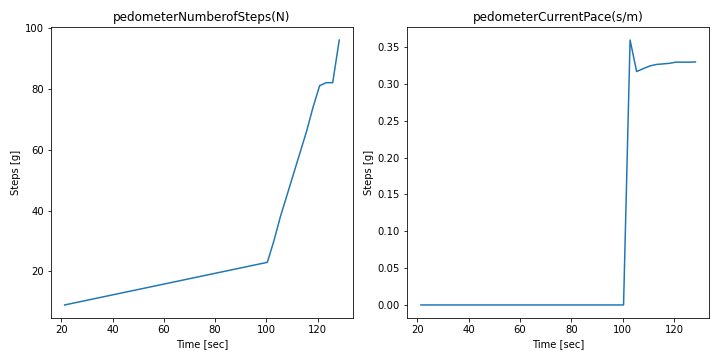

In [66]:
acccols3 = ['pedometerNumberofSteps(N)', 'pedometerCurrentPace(s/m)']

%matplotlib widget
fig, axes = plt.subplots (nrows=1, ncols=2, figsize=(10,5), sharex=True, squeeze=False)
axes = axes.flatten ()

xtime = ds_long['time_diff_seconds_pedometer']
#xtime = xtime - xtime [0] we removed this for coherency with later calculations 

for axis, col in zip (axes, acccols3):
    yacc = ds_long [col]
    axis.plot (xtime, yacc, label=col)
    axis.set_title (col)
    axis.set_xlabel ('Time [sec]')
    axis.set_ylabel ('Steps [g]')

plt.tight_layout ()

In [31]:
#inspecting the short recordings 
ds_1 = pd.read_csv('/Users/irenebernardi/Desktop/DS/miniproject/nsds2024-dsns2024-3d74831c793d/data/2023-11-09_09_06_39_Apple Watch.csv')
#visualize statistics
ds_1.describe()



,accelerometerTimestamp_sinceReboot(s),accelerometerAccelerationX(G),accelerometerAccelerationY(G),accelerometerAccelerationZ(G),motionTimestamp_sinceReboot(s),motionYaw(rad),motionRoll(rad),motionPitch(rad),motionRotationRateX(rad/s),motionRotationRateY(rad/s),...,pedometerCurrentPace(s/m),pedometerCurrentCadence(steps/s),pedometerDistance(m),pedometerFloorAscended(N),pedometerFloorDescended(N),altimeterTimestamp_sinceReboot(s),altimeterReset(bool),altimeterRelativeAltitude(m),altimeterPressure(kPa),label
count,43159.000000,43159.000000,43159.000000,43159.000000,43159.000000,43159.000000,43159.000000,43159.000000,43159.000000,43159.000000,...,43159.000000,43159.000000,43159.000000,43159.000000,43159.0,4.315900e+04,43159.0,43159.000000,43159.000000,43159.0
mean,429850.305361,-0.981173,0.309916,-0.122881,429850.294751,-0.544595,-1.369558,-0.297430,-0.025537,-0.015286,...,0.683513,1.691973,4557.201726,2.076670,4.0,7.200037e+08,0.0,18.000197,100.944984,0.0
std,248.103995,0.562717,0.389063,0.305750,248.103195,2.545482,0.398201,0.247383,1.301268,1.117516,...,0.264236,0.663993,291.621777,0.391097,0.0,2.943289e+07,0.0,68.149810,4.126655,0.0
min,429420.584410,-9.166260,-4.385956,-1.925705,429420.568248,-3.141586,-3.139590,-1.558564,-12.593549,-6.193638,...,0.000000,0.000000,4028.711000,2.000000,4.0,0.000000e+00,0.0,-4.679993,0.000000,0.0
25%,429635.449332,-1.237076,0.189919,-0.250885,429635.443129,-2.870531,-1.574697,-0.483322,-0.541045,-0.712399,...,0.772800,1.789356,4297.020000,2.000000,4.0,7.212066e+08,0.0,-2.649994,101.103500,0.0
50%,429850.309369,-0.922104,0.269623,-0.133438,429850.303165,-2.066080,-1.424896,-0.255304,0.055939,-0.054339,...,0.794826,1.818410,4554.391000,2.000000,4.0,7.212068e+08,0.0,-1.330017,101.119300,0.0
75%,430065.162016,-0.732506,0.398216,0.000671,430065.145856,2.381404,-1.243518,-0.108334,0.558455,0.785688,...,0.806390,1.844723,4819.125000,2.000000,4.0,7.212070e+08,0.0,-0.020020,101.131200,0.0
max,430280.014687,3.018494,5.671677,4.324463,430279.998527,3.141566,3.139388,0.299595,14.181427,5.805107,...,1.286627,3.099673,5042.646000,5.000000,4.0,7.212073e+08,0.0,260.840000,101.154300,0.0


In [32]:
ds_s2 = pd.read_csv('/Users/irenebernardi/Desktop/DS/miniproject/nsds2024-dsns2024-3d74831c793d/data/2023-11-07_09_06_03_Apple Watch.csv')
ds_s2.describe()

,accelerometerTimestamp_sinceReboot(s),accelerometerAccelerationX(G),accelerometerAccelerationY(G),accelerometerAccelerationZ(G),motionTimestamp_sinceReboot(s),motionYaw(rad),motionRoll(rad),motionPitch(rad),motionRotationRateX(rad/s),motionRotationRateY(rad/s),...,pedometerCurrentPace(s/m),pedometerCurrentCadence(steps/s),pedometerDistance(m),pedometerFloorAscended(N),pedometerFloorDescended(N),altimeterTimestamp_sinceReboot(s),altimeterReset(bool),altimeterRelativeAltitude(m),altimeterPressure(kPa),label
count,38058.000000,38058.000000,38058.000000,38058.000000,38058.000000,38058.000000,38058.000000,38058.000000,38058.000000,38058.000000,...,38058.000000,38058.000000,38058.000000,38058.0,38058.000000,3.805800e+04,38058.0,38058.000000,38058.000000,38058.0
mean,405500.178736,-0.913243,0.332762,-0.097664,405500.163801,-0.361505,-1.384242,-0.331382,0.007776,-0.009532,...,0.620007,1.745685,1536.404206,1.0,1.867676,7.202193e+08,0.0,3.088619,101.349778,0.0
std,218.779724,0.600817,0.392247,0.337720,218.779724,1.198121,0.517940,0.299832,1.365022,1.095558,...,0.231172,0.637239,301.931394,0.0,0.338848,2.422296e+07,0.0,4.364934,3.409061,0.0
min,405121.250895,-9.749634,-3.764587,-1.987732,405121.235959,-3.141233,-3.137178,-1.567671,-13.193349,-6.202446,...,0.000000,0.000000,1029.374000,1.0,1.000000,0.000000e+00,0.0,-2.510010,0.000000,0.0
25%,405310.719097,-1.232498,0.173634,-0.223019,405310.704161,-0.990866,-1.573686,-0.459839,-0.606298,-0.676310,...,0.637680,1.871213,1263.498000,1.0,2.000000,7.210338e+08,0.0,-1.049988,101.417800,0.0
50%,405500.180770,-0.923088,0.295624,-0.095123,405500.165835,-0.446180,-1.446217,-0.274762,0.022809,-0.019085,...,0.726799,1.890239,1528.012000,1.0,2.000000,7.210339e+08,0.0,2.619995,101.470400,0.0
75%,405689.638989,-0.619270,0.427273,0.025967,405689.624055,-0.117342,-1.276313,-0.130712,0.632978,0.738176,...,0.743757,1.908147,1815.139000,1.0,2.000000,7.210341e+08,0.0,6.910004,101.513600,0.0
max,405879.100488,2.578156,4.629333,3.987122,405879.085553,3.141103,3.121368,0.428799,8.085984,6.224051,...,0.767011,2.989158,1972.857000,1.0,2.000000,7.210343e+08,0.0,22.540010,101.531200,0.0


# Data Analysis 




a. After the initial exploration, what can you say about the structure of the data? On different time-scales, what do you think the different intervals represent?


In [ ]:
#FIGHURE OUT TIMES CALES 



b. Using the tools we have learned, can you find the frequency of the steps? How? Describe in words the meaning behind your calculations.


we are just analyzing ds_long. might have to do the same for ds shorts

In [65]:
ds_long[['time_diff_seconds_pedometer', 'pedometerNumberofSteps(N)']]

ds_long.loc[ds_long['time_diff_seconds_pedometer'] >= 0, ['time_diff_seconds_pedometer', 'pedometerNumberofSteps(N)']].drop_duplicates()

,time_diff_seconds_pedometer,pedometerNumberofSteps(N)
0,21.328,9
332,100.349,23
460,102.898,30
588,105.447,38
715,107.996,45
843,110.545,52
972,113.094,59
1099,115.643,66
1227,118.192,74
1356,120.741,81


In [67]:
#tools we have learned meaning convolution??? TODO UNDERSTAND 
xtime = ds_long['time_diff_seconds_pedometer']
#freuqneyc: how often something happens over a time frame 
total_steps = 96
total_time = xtime.max()  # assuming xtime is in seconds
frequency_total = total_steps / total_time  # steps per second

frequency_total 

0.7477276090630817

In [69]:
#tools we have learned meaning convolution??? TODO UNDERSTAND 
xtime = ds_long['time_diff_seconds_pedometer']
#freuqneyc: how often something happens over a time frame 
walk_steps = 23 #TODO: INDEX WALK STEPS DONT JUST PASTE
total_time = 100.349 #toDO: INDEX TIME BETTER DONT JUST PASTE
frequency_walk = walk_steps / total_time  # steps per second

frequency_walk  
#very slow walk 

0.22920009168003666

In [70]:

xtime = ds_long['time_diff_seconds_pedometer']
#freuqneyc: how often something happens over a time frame 
run_steps = 96 - 23 #TODO: INDEX WALK STEPS DONT JUST PASTE
total_time = 128.389 - 100.349 #toDO: INDEX TIME BETTER DONT JUST PASTE
frequency_run = run_steps / total_time  # steps per second

frequency_run  

2.60342368045649

phrase better , should we have used convolutions or other tools seen inclass for frequency measurements? 


c. Using specgram or an alternative, plot and analyse the signals’ frequencies’ prevalence over time. 
Are the sessions stationary?

In [ ]:
%matplotlib widget
#first plotting overall frequency, expectin git wont be stationary 
plt.figure (figsize=(9,4))
nfft=frequency_total //2 #why divided by 2
overlap=nfft//2
s, *_ = plt.specgram (y, NFFT=nfft, Fs=frequency_total , noverlap=overlap, mode='magnitude', scale='linear')
plt.ylim (0, 100)
plt.colorbar ()


c. Using specgram or an alternative, plot and analyse the signals’ frequencies’ prevalence over time. 
Are the sessions stationary?

d. Are the sessions ergodic?

e. Combining the answers to the previous questions, what could different periods of the signal represent?

f. Can you distinguish between two types of steps (are they right and left steps)? How? ‘Try and error’ your approaches. 
Are you basing your supposition on external data?

g. Were there unmentioned sensors that proved more useful for your analysis?

3. Report
Follow the instructions above and remember, that it does not have to be a long paper.